In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')

In [7]:
# Convert date
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

# Split winning numbers
df[['N1','N2','N3','N4','N5','Powerball']] = (
    df['Winning Numbers']
    .str.split(' ', expand=True)
    .astype(int)
)

df['Multiplier'] = pd.to_numeric(df['Multiplier'], errors='coerce')

In [8]:
df

,Draw Date,Winning Numbers,Multiplier,N1,N2,N3,N4,N5,Powerball
0,2020-09-26,11 21 27 36 62 24,3.0,11,21,27,36,62,24
1,2020-09-30,14 18 36 49 67 18,2.0,14,18,36,49,67,18
2,2020-10-03,18 31 36 43 47 20,2.0,18,31,36,43,47,20
3,2020-10-07,06 24 30 53 56 19,2.0,6,24,30,53,56,19
4,2020-10-10,05 18 23 40 50 18,3.0,5,18,23,40,50,18
...,...,...,...,...,...,...,...,...,...
1824,2025-08-18,15 46 61 63 64 01,3.0,15,46,61,63,64,1
1825,2025-08-20,31 59 62 65 68 05,2.0,31,59,62,65,68,5
1826,2025-08-23,11 14 34 47 51 18,2.0,11,14,34,47,51,18
1827,2025-08-25,16 19 34 37 64 22,3.0,16,19,34,37,64,22


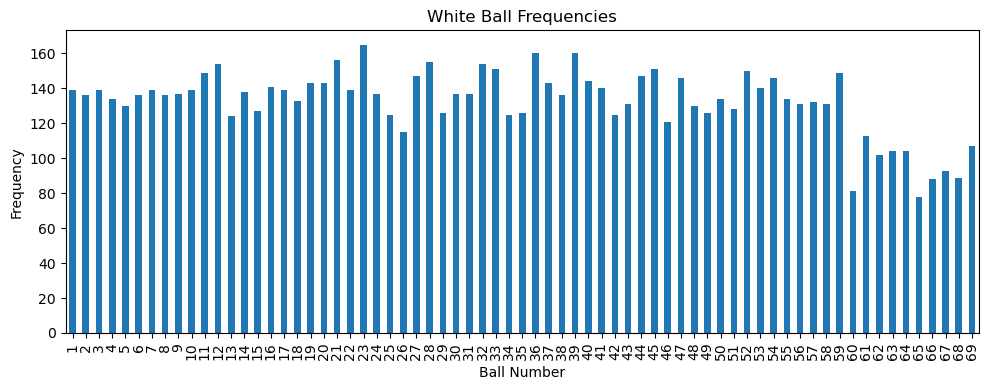

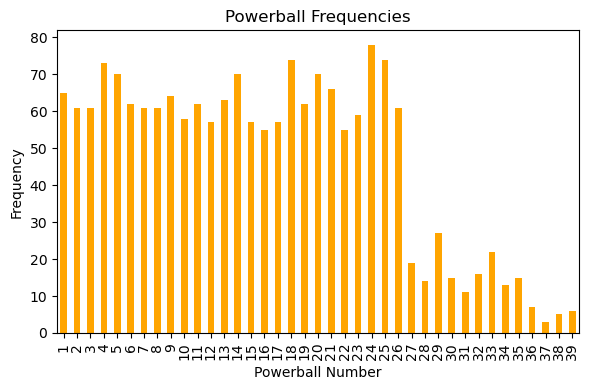

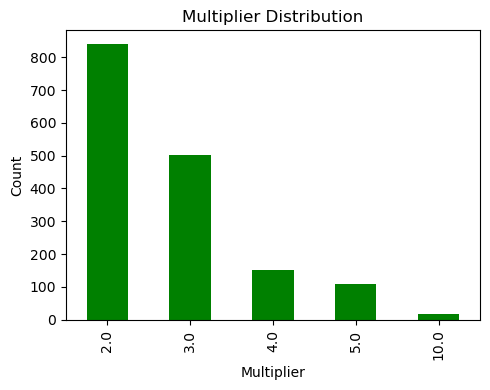

{'white_mean': 33.59103335155823,
 'white_median': 33.0,
 'white_std': 19.229016653099915,
 'power_mean': 15.290322580645162,
 'power_median': 15.0,
 'power_std': 9.007498660387986}

In [11]:
# Frequency analysis for white balls
white_balls = pd.concat([df['N1'], df['N2'], df['N3'], df['N4'], df['N5']])
white_freq = white_balls.value_counts().sort_index()

# Frequency analysis for Powerball
power_freq = df['Powerball'].value_counts().sort_index()

# Plot white ball frequencies
plt.figure(figsize=(10,4))
white_freq.plot(kind='bar')
plt.title("White Ball Frequencies")
plt.xlabel("Ball Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot powerball frequencies
plt.figure(figsize=(6,4))
power_freq.plot(kind='bar', color='orange')
plt.title("Powerball Frequencies")
plt.xlabel("Powerball Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Multiplier distribution
plt.figure(figsize=(5,4))
df['Multiplier'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Multiplier Distribution")
plt.xlabel("Multiplier")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Basic statistics summary

summary_stats = {
    "white_mean": white_balls.mean(),
    "white_median": white_balls.median(),
    "white_std": white_balls.std(),
    "power_mean": df['Powerball'].mean(),
    "power_median": df['Powerball'].median(),
    "power_std": df['Powerball'].std()
}

summary_stats

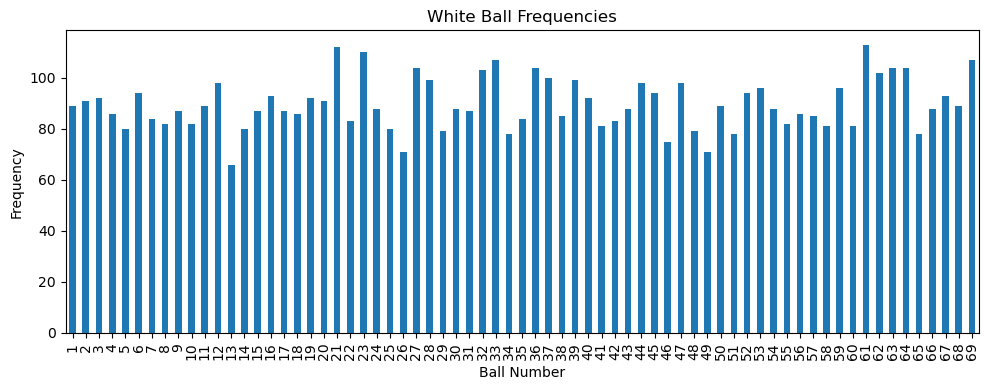

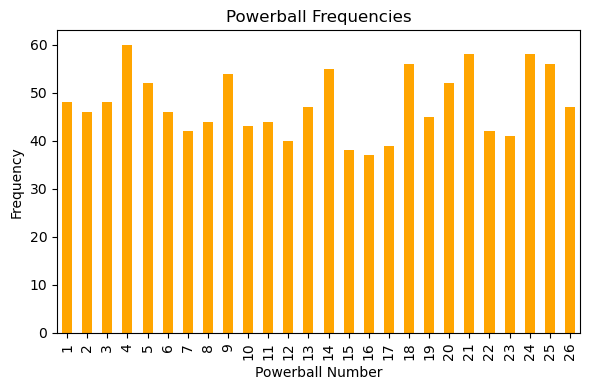

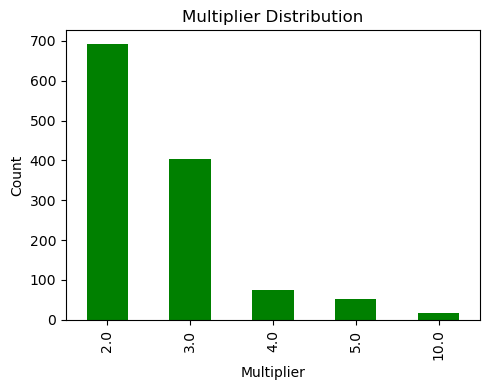

{'white_mean': 35.33263327948304,
 'white_median': 35.0,
 'white_std': 19.948447486709192,
 'power_mean': 13.565428109854604,
 'power_median': 14.0,
 'power_std': 7.649041888585802}

In [13]:
import pandas as pd

# Ensure 'Draw Date' is datetime
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

# Define the cutoff date
cutoff = pd.Timestamp("2015-10-07")

# Filter
df = df[df['Draw Date'] >= cutoff].copy()


# Frequency analysis for white balls
white_balls = pd.concat([df['N1'], df['N2'], df['N3'], df['N4'], df['N5']])
white_freq = white_balls.value_counts().sort_index()

# Frequency analysis for Powerball
power_freq = df['Powerball'].value_counts().sort_index()

# Plot white ball frequencies
plt.figure(figsize=(10,4))
white_freq.plot(kind='bar')
plt.title("White Ball Frequencies")
plt.xlabel("Ball Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot powerball frequencies
plt.figure(figsize=(6,4))
power_freq.plot(kind='bar', color='orange')
plt.title("Powerball Frequencies")
plt.xlabel("Powerball Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Multiplier distribution
plt.figure(figsize=(5,4))
df['Multiplier'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Multiplier Distribution")
plt.xlabel("Multiplier")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Basic statistics summary

summary_stats = {
    "white_mean": white_balls.mean(),
    "white_median": white_balls.median(),
    "white_std": white_balls.std(),
    "power_mean": df['Powerball'].mean(),
    "power_median": df['Powerball'].median(),
    "power_std": df['Powerball'].std()
}

summary_stats


In [14]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Assume df_recent already preprocessed and has columns N1..N5
white_cols = ['N1','N2','N3','N4','N5']

# Generate all pairs for each row
pair_counter = Counter()
for _, row in df_recent[white_cols].iterrows():
    nums = sorted(row.values)
    pairs = combinations(nums, 2)
    pair_counter.update(pairs)

# Convert to DataFrame
pair_df = pd.DataFrame(pair_counter.items(), columns=["Pair","Count"])
pair_df = pair_df.sort_values("Count", ascending=False).reset_index(drop=True)

# Show top 20 pairs
print(pair_df.head(20))


        Pair  Count
0   (21, 32)     15
1   (51, 61)     14
2   (61, 69)     14
3   (37, 44)     14
4   (23, 32)     13
5   (37, 63)     12
6   (30, 62)     12
7    (6, 35)     12
8   (28, 63)     12
9   (40, 50)     12
10  (12, 21)     12
11  (27, 44)     12
12   (6, 36)     12
13  (21, 62)     12
14  (24, 63)     12
15   (8, 27)     12
16  (30, 33)     11
17  (12, 20)     11
18  (21, 49)     11
19   (2, 23)     11


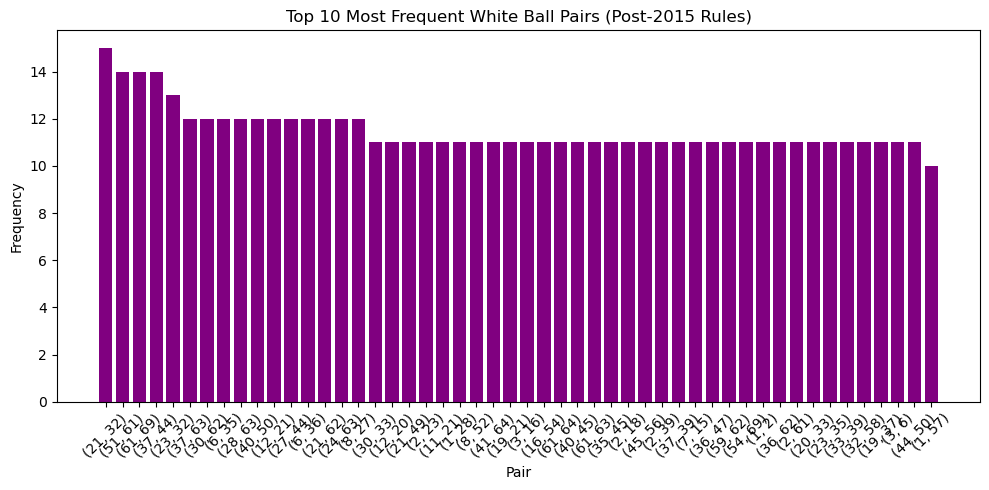

,Pair,Count
0,"(21, 32)",15
1,"(51, 61)",14
2,"(61, 69)",14
3,"(37, 44)",14
4,"(23, 32)",13
5,"(37, 63)",12
6,"(30, 62)",12
7,"(6, 35)",12
8,"(28, 63)",12
9,"(40, 50)",12


In [16]:
from itertools import combinations
from collections import Counter

# Using df_recent from earlier filtering (simulate here by reusing df)
df_recent = df[df['Draw Date'] >= pd.Timestamp("2015-10-07")].copy()

# Extract white ball columns
white_cols = ['N1','N2','N3','N4','N5']

# Count pairs
pair_counter = Counter()
for _, row in df_recent[white_cols].iterrows():
    nums = sorted(row.values)
    pairs = combinations(nums, 2)
    pair_counter.update(pairs)

pair_df = pd.DataFrame(pair_counter.items(), columns=["Pair","Count"])
pair_df = pair_df.sort_values("Count", ascending=False).reset_index(drop=True)

# Take top pairs
top_pairs = pair_df.head(50)

# Visualization
plt.figure(figsize=(10,5))
plt.bar([str(p) for p in top_pairs['Pair']], top_pairs['Count'], color="purple")
plt.title("Top 10 Most Frequent White Ball Pairs (Post-2015 Rules)")
plt.xlabel("Pair")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_pairs


In [17]:
len(df_recent)

1238

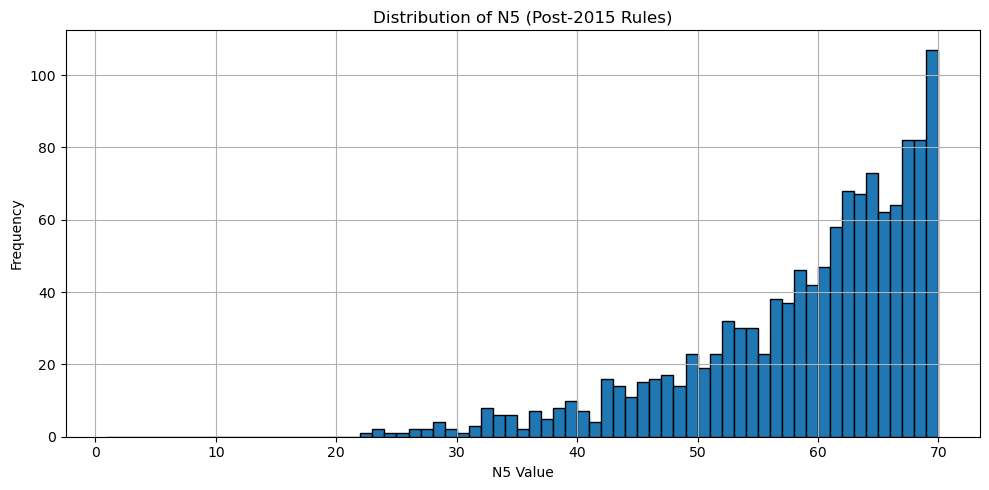

count    1238.000000
mean       58.485460
std         9.564876
min        22.000000
25%        53.000000
50%        61.000000
75%        66.000000
max        69.000000
Name: N5, dtype: float64

In [18]:
# Plot distribution of N5 (the fifth white ball)
plt.figure(figsize=(10,5))
df_recent['N5'].hist(bins=range(1,71), edgecolor='black')
plt.title("Distribution of N5 (Post-2015 Rules)")
plt.xlabel("N5 Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Basic statistics for N5
n5_stats = df_recent['N5'].describe()
n5_stats


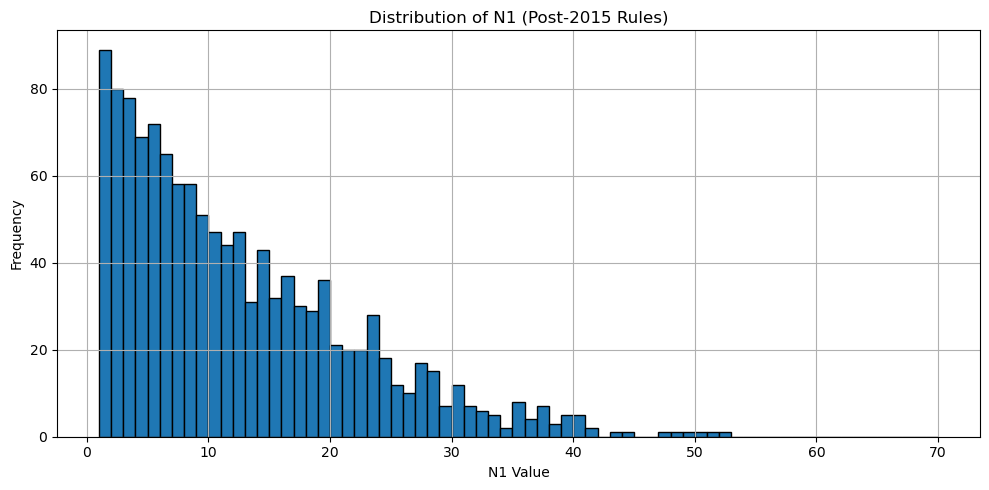

count    1238.000000
mean       11.960420
std         9.528626
min         1.000000
25%         4.000000
50%         9.000000
75%        17.000000
max        52.000000
Name: N1, dtype: float64

In [19]:
# Plot distribution of N1 (the first white ball)
plt.figure(figsize=(10,5))
df_recent['N1'].hist(bins=range(1,71), edgecolor='black')
plt.title("Distribution of N1 (Post-2015 Rules)")
plt.xlabel("N1 Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Basic statistics for N1
n1_stats = df_recent['N1'].describe()
n1_stats


In [21]:
# 合并所有白球
all_white = pd.concat([df_recent['N1'], df_recent['N2'], df_recent['N3'], df_recent['N4'], df_recent['N5']])

# 做卡方均匀性检验
chi2, p = chi_square_uniform_test(all_white, max_num=69)

chi2, p


(77.45169628432956, 0.20262639880427633)

In [22]:
import numpy as np
from scipy.stats import chisquare

# 合并所有白球
all_white = pd.concat([df_recent[c] for c in ['N1','N2','N3','N4','N5']])

# 划分为上下半区
low = (all_white <= 34).sum()
high = (all_white >= 35).sum()

# 理论上应当各占一半
expected = [len(all_white)/2, len(all_white)/2]
observed = [low, high]

chi2, p = chisquare(observed, f_exp=expected)
print("Chi2:", chi2, "p-value:", p)


Chi2: 3.1663974151857834 p-value: 0.07516808150989293


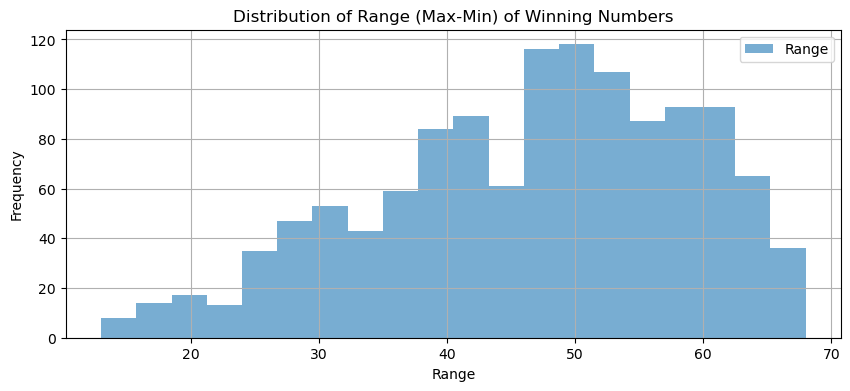

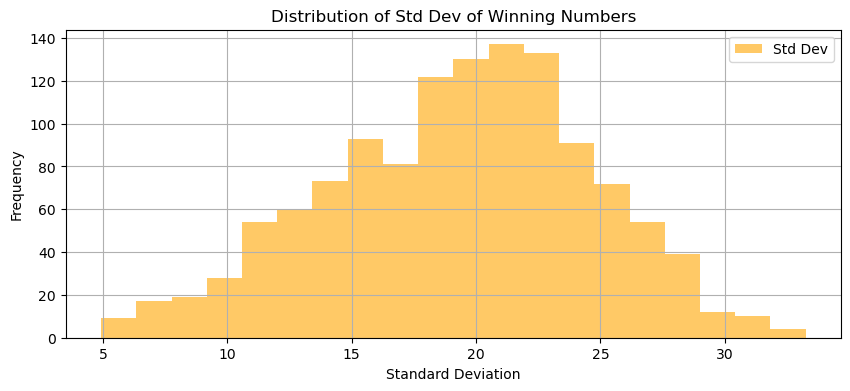

In [23]:
import numpy as np
import matplotlib.pyplot as plt

white_cols = ['N1','N2','N3','N4','N5']

# 计算每期的离散程度
df_recent['range'] = df_recent[white_cols].max(axis=1) - df_recent[white_cols].min(axis=1)
df_recent['std'] = df_recent[white_cols].std(axis=1)

# 可视化
plt.figure(figsize=(10,4))
df_recent['range'].hist(bins=20, alpha=0.6, label='Range')
plt.title("Distribution of Range (Max-Min) of Winning Numbers")
plt.xlabel("Range")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
df_recent['std'].hist(bins=20, alpha=0.6, label='Std Dev', color='orange')
plt.title("Distribution of Std Dev of Winning Numbers")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.legend()
plt.show()


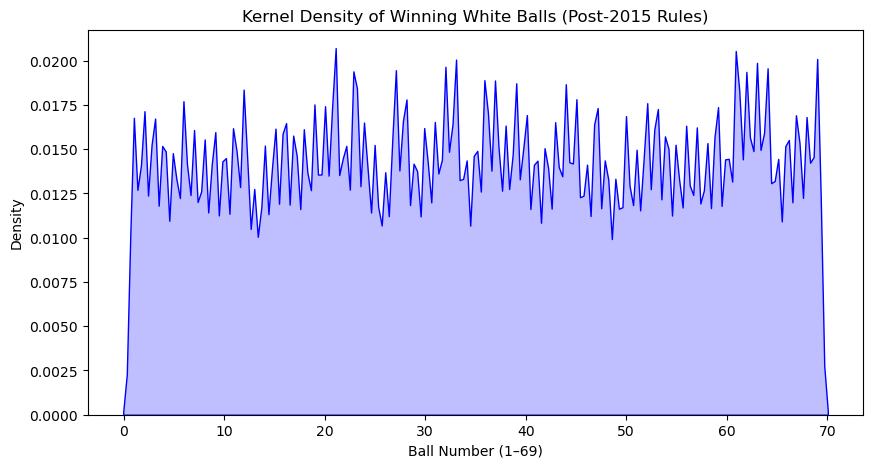

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 合并所有白球
all_white = pd.concat([df_recent['N1'], df_recent['N2'], df_recent['N3'],
                       df_recent['N4'], df_recent['N5']])

plt.figure(figsize=(10,5))
sns.kdeplot(all_white, bw_adjust=0.1, fill=True, color="blue")
plt.title("Kernel Density of Winning White Balls (Post-2015 Rules)")
plt.xlabel("Ball Number (1–69)")
plt.ylabel("Density")
plt.show()


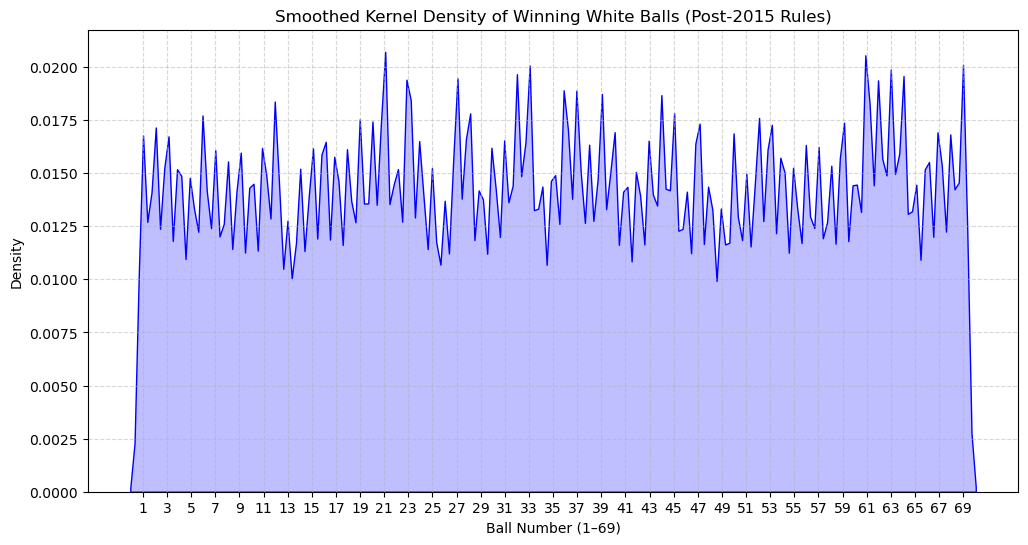

In [31]:
plt.figure(figsize=(12,6))
sns.kdeplot(all_white, bw_adjust=0.1, fill=True, color="blue")
plt.title("Smoothed Kernel Density of Winning White Balls (Post-2015 Rules)")
plt.xlabel("Ball Number (1–69)")
plt.ylabel("Density")
plt.xticks(range(1,70,2))   # 每隔 2 显示一个刻度
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

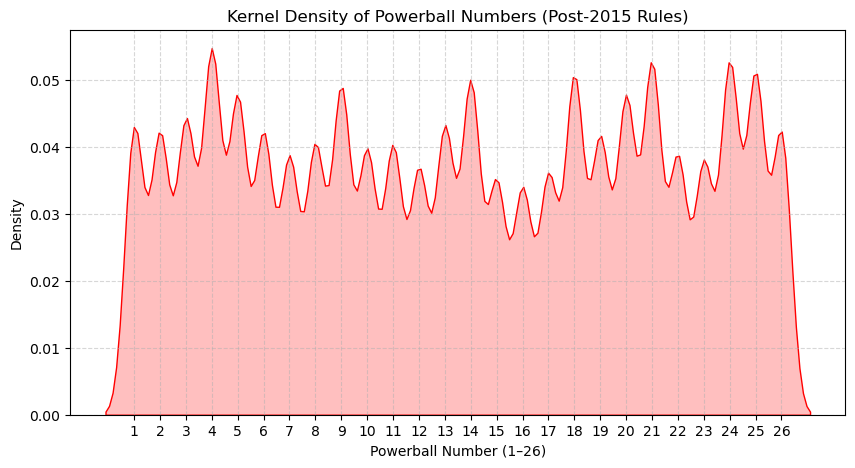

In [33]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_recent['Powerball'], bw_adjust=0.2, fill=True, color="red")
plt.title("Kernel Density of Powerball Numbers (Post-2015 Rules)")
plt.xlabel("Powerball Number (1–26)")
plt.ylabel("Density")
plt.xticks(range(1,27))  # 每个号码都有刻度
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

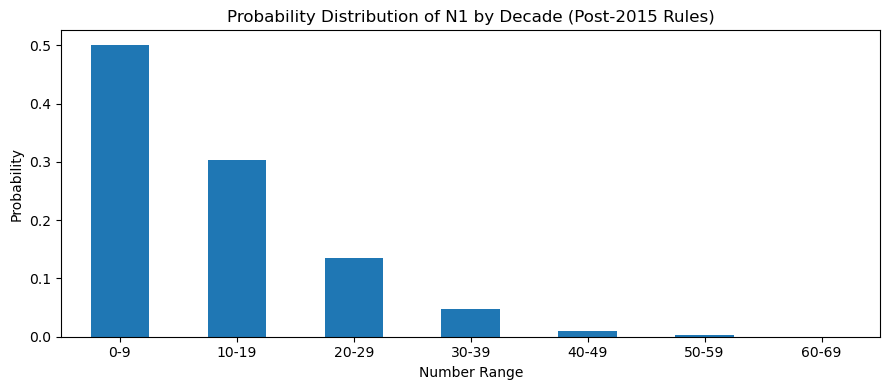

N1
0-9      0.500808
10-19    0.303716
20-29    0.135703
30-39    0.047658
40-49    0.009693
50-59    0.002423
60-69    0.000000
Name: proportion, dtype: float64

In [35]:
# Fix the bin edges vs labels mismatch and compute the decade probabilities for N1

import pandas as pd
import matplotlib.pyplot as plt

# Build correct edges (0,10,...,70) and matching labels (0-9,...,60-69)
edges = list(range(0, 71, 10))  # 8 edges -> 7 bins
labels = [f"{i}-{i+9}" for i in range(0, 70, 10)]  # 7 labels

# Cut into bins
n1_bins = pd.cut(
    df_recent['N1'],
    bins=edges,
    labels=labels,
    right=False,           # include left, exclude right: [0,10)
    include_lowest=True    # include 0 in the first bin if present
)

# Probability distribution
n1_dist = n1_bins.value_counts(normalize=True).sort_index()

# Plot
plt.figure(figsize=(9,4))
n1_dist.plot(kind='bar')
plt.title("Probability Distribution of N1 by Decade (Post-2015 Rules)")
plt.xlabel("Number Range")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

n1_dist


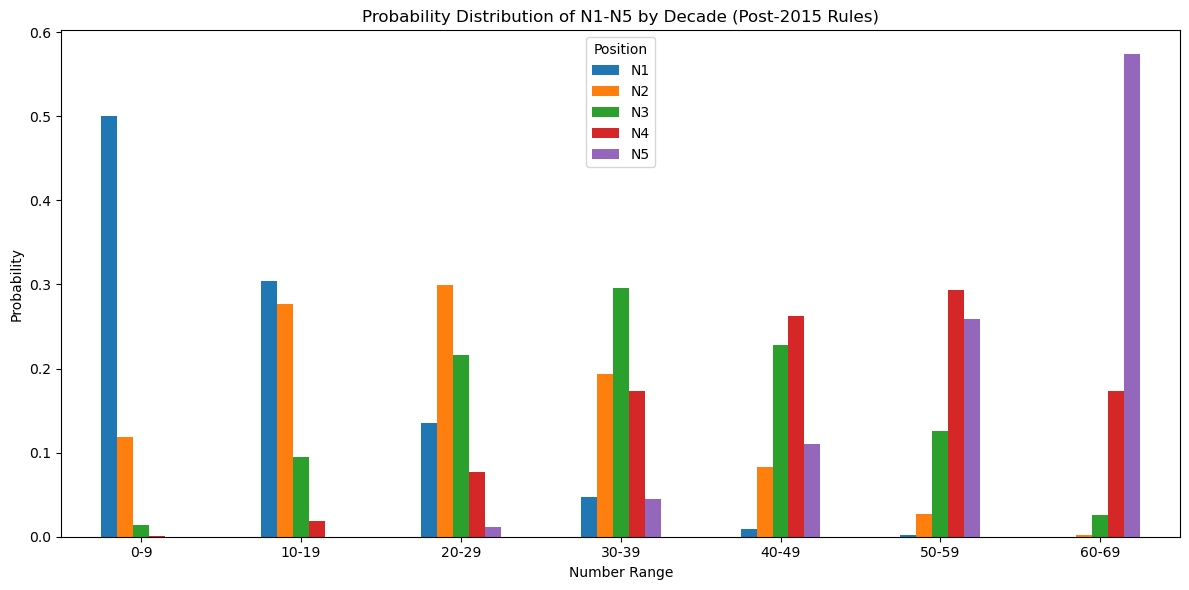

,N1,N2,N3,N4,N5
0-9,0.500808,0.118740,0.013732,0.000808,0.000000
10-19,0.303716,0.277060,0.095315,0.018578,0.000000
20-29,0.135703,0.299677,0.215670,0.077544,0.012116
30-39,0.047658,0.193053,0.295638,0.173667,0.045234
40-49,0.009693,0.083199,0.227787,0.262520,0.110662
50-59,0.002423,0.026656,0.126010,0.293215,0.258481
60-69,0.000000,0.001616,0.025848,0.173667,0.573506


In [36]:
# Define bins and labels once
edges = list(range(0, 71, 10))
labels = [f"{i}-{i+9}" for i in range(0, 70, 10)]

# Container for results
dist_dict = {}

# Compute distributions for N1-N5
for col in ['N1','N2','N3','N4','N5']:
    bins = pd.cut(df_recent[col], bins=edges, labels=labels, right=False, include_lowest=True)
    dist = bins.value_counts(normalize=True).sort_index()
    dist_dict[col] = dist

# Convert to DataFrame for easy plotting
dist_df = pd.DataFrame(dist_dict)

# Plot side-by-side bar chart
dist_df.plot(kind="bar", figsize=(12,6))
plt.title("Probability Distribution of N1-N5 by Decade (Post-2015 Rules)")
plt.xlabel("Number Range")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.legend(title="Position")
plt.tight_layout()
plt.show()

dist_df


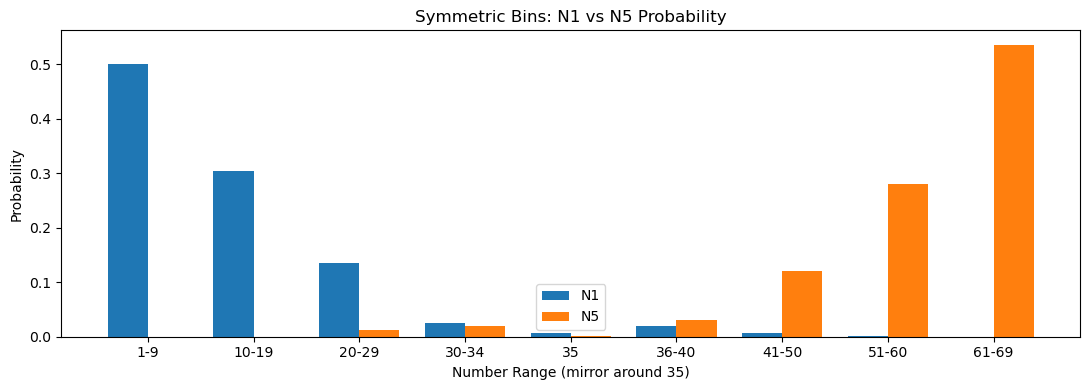

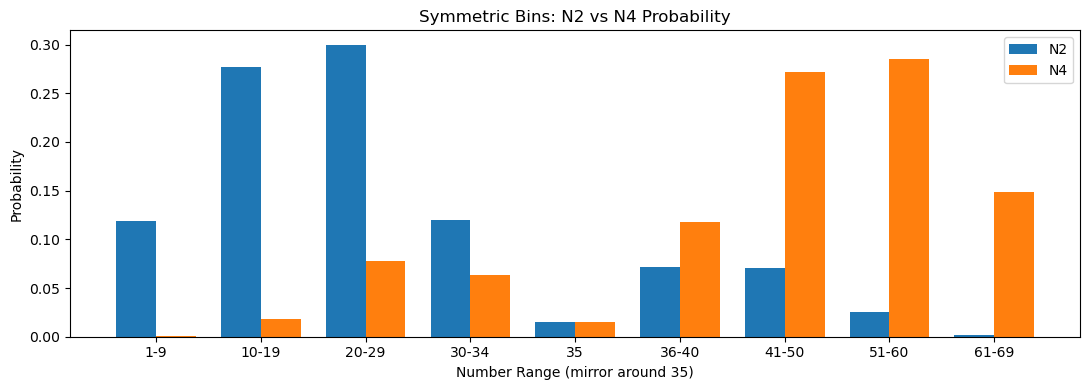

,N1,N2,N3,N4,N5
1-9,0.500808,0.118740,0.013732,0.000808,0.000000
10-19,0.303716,0.277060,0.095315,0.018578,0.000000
20-29,0.135703,0.299677,0.215670,0.077544,0.012116
30-34,0.025848,0.119548,0.145396,0.063813,0.019386
35,0.006462,0.015347,0.029079,0.015347,0.001616
36-40,0.019386,0.071890,0.148627,0.117932,0.029887
41-50,0.006462,0.071082,0.221325,0.272213,0.120355
51-60,0.001616,0.025040,0.107431,0.285137,0.281099
61-69,0.000000,0.001616,0.023425,0.148627,0.535541


In [38]:
# Build perfectly symmetric bins around 35 for numbers in 1..69
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Symmetric bin edges and labels (mirror by x -> 70 - x)
edges_sym = [1, 10, 20, 30, 35, 36, 41, 51, 61, 70]  # produces 9 bins
labels_sym = ["1-9", "10-19", "20-29", "30-34", "35", "36-40", "41-50", "51-60", "61-69"]

def decade_sym_dist(series):
    binned = pd.cut(series, bins=edges_sym, labels=labels_sym, right=False, include_lowest=True)
    return binned.value_counts(normalize=True).sort_index()

# Compute symmetric distributions for N1..N5
sym_dists = {}
for col in ['N1','N2','N3','N4','N5']:
    sym_dists[col] = decade_sym_dist(df_recent[col])

sym_df = pd.DataFrame(sym_dists).loc[labels_sym]  # ensure order

# Plot N1 vs N5 (mirror comparison)
plt.figure(figsize=(11,4))
x = np.arange(len(labels_sym))
width = 0.38
plt.bar(x - width/2, sym_df['N1'].values, width, label='N1')
plt.bar(x + width/2, sym_df['N5'].values, width, label='N5')
plt.xticks(x, labels_sym, rotation=0)
plt.title("Symmetric Bins: N1 vs N5 Probability")
plt.xlabel("Number Range (mirror around 35)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()

# Plot N2 vs N4 (mirror comparison)
plt.figure(figsize=(11,4))
plt.bar(x - width/2, sym_df['N2'].values, width, label='N2')
plt.bar(x + width/2, sym_df['N4'].values, width, label='N4')
plt.xticks(x, labels_sym, rotation=0)
plt.title("Symmetric Bins: N2 vs N4 Probability")
plt.xlabel("Number Range (mirror around 35)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()

# (Optional) overall table of N1..N5 symmetric distributions
sym_df
